In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from xgboost import plot_tree
from sklearn.linear_model import LogisticRegression


In [5]:
raw = pd.read_csv("../data/raw.csv")


In [6]:
def clean(data):
    return data[data["gender"] != "Other"]

In [7]:
data = clean(raw)

In [8]:
def plot(data):
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(5, 3, figsize=(20, 30))
    axes = axes.flatten()

    sns.countplot(
        x="diabetes",
        data=data,
        ax=axes[0],
        palette="viridis",
        hue="diabetes",
        legend=False,
    )
    axes[0].set_title("Distribution of Diabetes Status (0=No, 1=Yes)")
    axes[0].set_xlabel("Diabetes Status")  # Corrected label

    sns.histplot(data=data, x="age", ax=axes[1], color="skyblue", bins=30)
    axes[1].set_title("Age Distribution")

    bmi_finite = data.loc[np.isfinite(data["bmi"]), "bmi"]
    sns.histplot(data=bmi_finite, ax=axes[2], color="lightcoral", bins=30)
    axes[2].set_title("BMI Distribution")
    axes[2].set_xlabel("BMI")
    sns.histplot(data=data, x="HbA1c_level", kde=True, ax=axes[3], color="lightgreen")
    axes[3].set_title("HbA1c Level Distribution")

    sns.histplot(data=data, x="blood_glucose_level", kde=True, ax=axes[4], color="gold")
    axes[4].set_title("Blood Glucose Level Distribution")

    sns.countplot(
        y="smoking_history",
        data=data,
        ax=axes[5],
        palette="Spectral",
        order=data["smoking_history"].value_counts().index,
    )
    axes[5].set_title("Smoking History Distribution")
    axes[5].tick_params(axis="y", rotation=0)

    sns.boxplot(
        x="diabetes",
        y="age",
        data=data,
        ax=axes[6],
        palette="coolwarm",
        hue="diabetes",
        legend=False,
    )
    axes[6].set_title("Age Distribution by Diabetes Status")
    axes[6].set_xlabel("Diabetes Status (0=No, 1=Yes)")

    sns.boxplot(
        x="diabetes",
        y="bmi",
        data=data,
        ax=axes[7],
        palette="coolwarm",
        hue="diabetes",
        legend=False,
    )
    axes[7].set_title("BMI Distribution by Diabetes Status")
    axes[7].set_xlabel("Diabetes Status (0=No, 1=Yes)")

    sns.boxplot(
        x="diabetes",
        y="HbA1c_level",
        data=data,
        ax=axes[8],
        palette="coolwarm",
        hue="diabetes",
        legend=False,
    )
    axes[8].set_title("HbA1c Level by Diabetes Status")
    axes[8].set_xlabel("Diabetes Status (0=No, 1=Yes)")

    sns.boxplot(
        x="diabetes",
        y="blood_glucose_level",
        data=data,
        ax=axes[9],
        palette="coolwarm",
        hue="diabetes",
        legend=False,
    )
    axes[9].set_title("Blood Glucose Level by Diabetes Status")
    axes[9].set_xlabel("Diabetes Status (0=No, 1=Yes)")

    sns.countplot(
        x="smoking_history",
        hue="diabetes",
        data=data,
        ax=axes[10],
        palette="pastel",
        order=data["smoking_history"].value_counts().index,
    )
    axes[10].set_title("Smoking History by Diabetes Status")
    axes[10].tick_params(axis="x", rotation=45)
    axes[10].set_xlabel("Smoking History")
    axes[10].legend(title="Diabetes", labels=["No", "Yes"])

    numerical_cols = [
        "age",
        "bmi",
        "HbA1c_level",
        "blood_glucose_level",
        "hypertension",
        "heart_disease",
        "diabetes",
    ]
    corr_data = data[numerical_cols].replace([np.inf, -np.inf], np.nan).dropna()
    correlation_matrix = corr_data.corr()
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="vlag",
        fmt=".2f",
        linewidths=0.5,
        ax=axes[11],
    )
    axes[11].set_title("Correlation Matrix (Numerical Features)")
    axes[11].tick_params(axis="x", rotation=45)
    axes[11].tick_params(axis="y", rotation=0)

    gender_diabetes_pct = data.groupby("gender")["diabetes"].mean().reset_index()
    gender_diabetes_pct["diabetes"] *= 100  # Convert proportion to percentage
    sns.barplot(
        x="gender",
        y="diabetes",
        data=gender_diabetes_pct,
        ax=axes[12],
        palette="Blues",
        hue="gender",
        legend=False,
    )
    axes[12].set_title("Diabetes Percentage by Gender")
    axes[12].set_ylabel("Diabetes (%)")
    axes[12].set_xlabel("Gender")
    for container in axes[12].containers:
        axes[12].bar_label(container, fmt="%.1f%%")

    hypertension_diabetes_pct = (
        data.groupby("hypertension")["diabetes"].mean().reset_index()
    )
    hypertension_diabetes_pct["diabetes"] *= 100
    hypertension_diabetes_pct["hypertension"] = hypertension_diabetes_pct[
        "hypertension"
    ].map({0: "No", 1: "Yes"})
    sns.barplot(
        x="hypertension",
        y="diabetes",
        data=hypertension_diabetes_pct,
        ax=axes[13],
        palette="Reds",
        hue="hypertension",
        legend=False,
    )
    axes[13].set_title("Diabetes Percentage by Hypertension")
    axes[13].set_ylabel("Diabetes (%)")
    axes[13].set_xlabel("Hypertension Status")
    for container in axes[13].containers:
        axes[13].bar_label(container, fmt="%.1f%%")

    heart_disease_diabetes_pct = (
        data.groupby("heart_disease")["diabetes"].mean().reset_index()
    )
    heart_disease_diabetes_pct["diabetes"] *= 100
    heart_disease_diabetes_pct["heart_disease"] = heart_disease_diabetes_pct[
        "heart_disease"
    ].map({0: "No", 1: "Yes"})
    sns.barplot(
        x="heart_disease",
        y="diabetes",
        data=heart_disease_diabetes_pct,
        ax=axes[14],
        palette="Greens",
        hue="heart_disease",
        legend=False,
    )
    axes[14].set_title("Diabetes Percentage by Heart Disease")
    axes[14].set_ylabel("Diabetes (%)")
    axes[14].set_xlabel("Heart Disease Status")
    for container in axes[14].containers:
        axes[14].bar_label(container, fmt="%.1f%%")

    plt.tight_layout()
    plt.show()

In [9]:
def numerization(data):
    object_columns = data.select_dtypes("object").columns
    encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    encoder.fit(data[object_columns])
    encoded_array = encoder.transform(data[object_columns])
    encoded_columns = encoder.get_feature_names_out(object_columns)

    encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns, index=data.index)
    non_cat_data = data.drop(columns=object_columns)
    final_df = pd.concat([non_cat_data, encoded_df], axis=1)

    return final_df

In [10]:
processed_data = numerization(data)

In [11]:
def split_data(data, val_size=0.25):
    columns = list((data).columns)
    columns.remove("diabetes")
    X = data[columns]
    y = data.diabetes

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=val_size * 2, random_state=42
    )

    return X_train, X_test, y_train, y_test

In [12]:
X_train, X_val, y_train, y_val = split_data(processed_data)

In [13]:
def train_xgb_model(X, y, n_estimators, max_depth):
    model = XGBRegressor(
        random_state=42, n_jobs=-1, n_estimators=n_estimators, max_depth=max_depth
    )
    model.fit(X, y)
    return model


def binarize(Y, treshold=0.7):
    return (Y > treshold).astype(int)


def evaluate_model(model, X_train, X_val, y_train, y_val, threshold=0.5, printit=False):
    train_preds_continuous = model.predict(X_train)
    val_preds_continuous = model.predict(X_val)

    train_preds_binary = (train_preds_continuous >= threshold).astype(int)
    val_preds_binary = (val_preds_continuous >= threshold).astype(int)

    train_acc = accuracy_score(y_train, train_preds_binary)
    val_acc = accuracy_score(y_val, val_preds_binary)

    if printit:
        print(f"Accuracy on training data: {round(100 * train_acc, 2)}%")
        print(f"Accuracy on validation data: {round(100 * val_acc, 2)}%")

    return train_acc, val_acc


def train_logistic_regression(X, y):
    model = LogisticRegression(max_iter=10_000, n_jobs=-1)
    model.fit(X, y)
    return model


def naive_model(X_input):
    return np.zeros(len(X_input))


def train_decision_tree(X, y):
    model = DecisionTreeClassifier(random_state=42, max_depth=3)
    model.fit(X, y)
    return model


def get_confusion_matrix(model, X_val, y_val, threshold=0.5, printit=False):
    val_preds_continuous = model.predict(X_val)

    if val_preds_continuous.ndim > 1 and val_preds_continuous.shape[1] > 1:
        val_preds_continuous = val_preds_continuous[:, 1]
    elif val_preds_continuous.ndim > 1 and val_preds_continuous.shape[1] == 1:
        val_preds_continuous = val_preds_continuous.flatten()

    val_preds_binary = (val_preds_continuous >= threshold).astype(int)

    cm = confusion_matrix(y_val, val_preds_binary)

    if printit:
        print("Confusion Matrix (Validation Set):")
        print(cm)

    return cm

Accuracy on training data: 97.18%
Accuracy on validation data: 97.19%


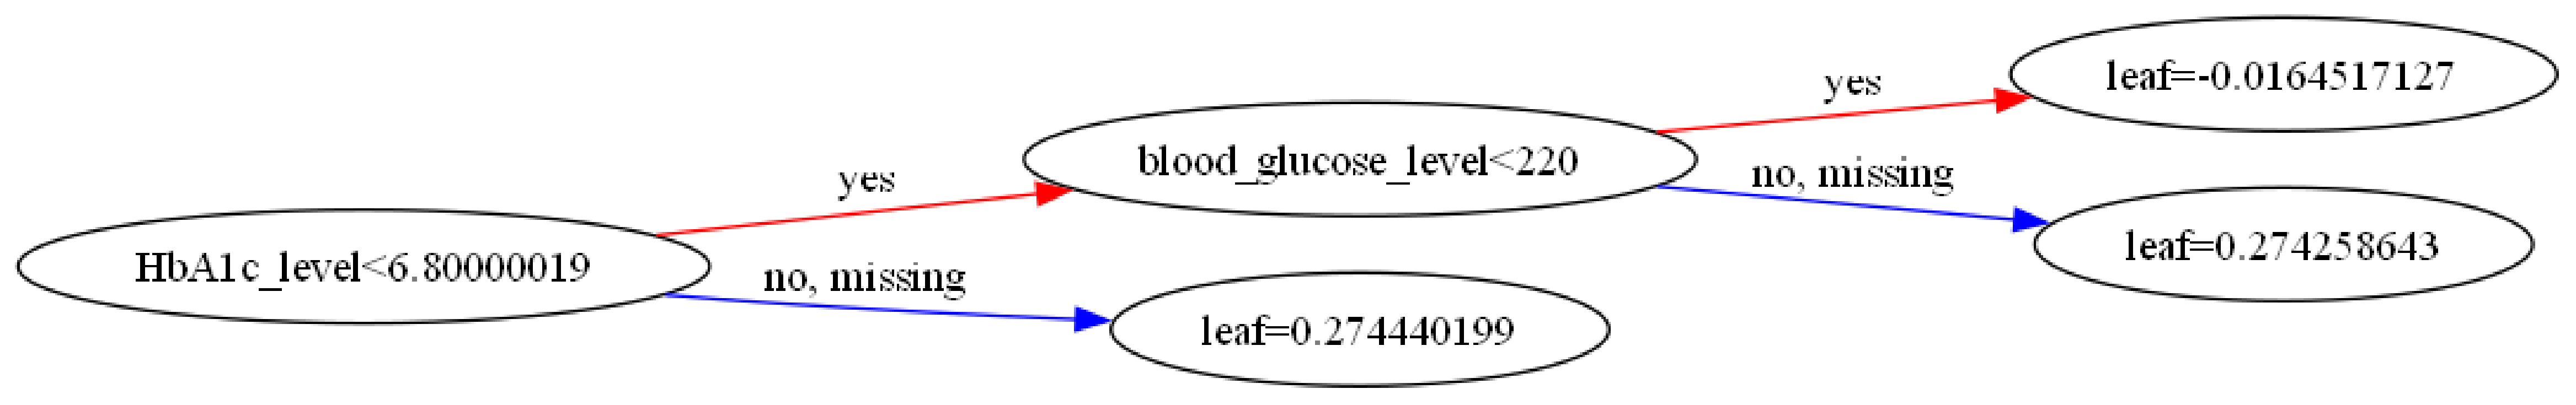

In [14]:
XGBMODEL = train_xgb_model(X_train, y_train, 4, 2)
y = XGBMODEL.predict(X_train)
evaluate_model(XGBMODEL, X_train, X_val, y_train, y_val, threshold=0.5, printit=True)

fig, ax = plt.subplots(figsize=(60, 60))
plot_tree(XGBMODEL, rankdir="LR", ax=ax)
plt.show()

In [15]:
LR = train_logistic_regression(X_train, y_train)
evaluate_model(LR, X_train, X_val, y_train, y_val, threshold=0.5, printit=True)

Accuracy on training data: 96.04%
Accuracy on validation data: 96.01%


(0.9603728671160809, 0.9601128203076553)

In [16]:
decision_tree_model = train_decision_tree(X_train, y_train)

In [17]:
evaluate_model(
    decision_tree_model, X_train, X_val, y_train, y_val, threshold=0.5, printit=True
)

Accuracy on training data: 97.18%
Accuracy on validation data: 97.19%


(0.9717949230861556, 0.9719349482906924)

In [18]:
data[["diabetes"]].value_counts()

diabetes
0           91482
1            8500
Name: count, dtype: int64

In [ ]:


def analyze_decision_tree(model):
    # Basic check for scikit-learn tree attributes
    if not hasattr(model, "get_depth") or not hasattr(model, "get_n_leaves"):
        print(
            "Error: Model does not have 'get_depth' or 'get_n_leaves' methods. "
            "Expected a trained scikit-learn Decision Tree model."
        )
        return

    print("--- Decision Tree Analysis ---")
    try:
        depth = model.get_depth()
        leaves = model.get_n_leaves()
        print(f"Maximum Depth: {depth}")
        print(f"Number of Leaves: {leaves}")
    except Exception as e:
        print(f"Error analyzing decision tree: {e}")
    print("------------------------------")


In [ ]:
analyze_linear_regression()

In [16]:
%%timeit
train_decision_tree(X_train, y_train)


35.2 ms ± 2.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
%%timeit
train_logistic_regression(X_train, y_train)


5.1 s ± 116 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%%timeit
train_xgb_model(X_train, y_train, 4, 2)

32.7 ms ± 8.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


---


In [19]:
%%timeit
XGBMODEL.predict(X_val)

4.15 ms ± 2.22 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
%%timeit
LR.predict(X_val)

4.1 ms ± 282 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
%%timeit
decision_tree_model.predict(X_val)

5.43 ms ± 274 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
%%timeit
naive_model(X_val)

6 μs ± 61.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [23]:
get_confusion_matrix(XGBMODEL, X_val, y_val, printit=True)
get_confusion_matrix(decision_tree_model, X_val, y_val, printit=True)
get_confusion_matrix(LR, X_val, y_val, printit=True)

Confusion Matrix (Validation Set):
[[45727     0]
 [ 1403  2861]]
Confusion Matrix (Validation Set):
[[45727     0]
 [ 1403  2861]]
Confusion Matrix (Validation Set):
[[45295   432]
 [ 1562  2702]]


array([[45295,   432],
       [ 1562,  2702]])

In [24]:
Model_pd = pd.DataFrame(
    {
        "Model": [
            "Naive always no",
            "Logistical Regression",
            "XGBoost",
            "Decision Tree",
        ],
        "Training Time (ms)": [0, 5210, 38.8, 22.3],
        "Accuracy Score %": [90.00, 96.01, 97.19, 97.18],
        "Predicting Time (ms)": [0.005, 4.81, 2.9, 6.46],
        "True Positives": [0, 45295, 45727, 45727],
        "False Negatives": [4264, 1562, 1403, 1403],
        "ROC Auc Score": [np.nan, 0.91, 0.98, 0.98],
        "Size (kb)": [0, 1.19, 7.80, 2.00],
    }
)

In [25]:
print(roc_auc_score(binarize(XGBMODEL.predict(X_val)), y_val))
print(roc_auc_score(decision_tree_model.predict(X_val), y_val))
print(roc_auc_score(LR.predict(X_val), y_val))

0.9851156375981328
0.9851156375981328
0.9144107601943695


In [26]:
import pickle
import sys


def get_model_size_in_mb(model):
    model_bytes = pickle.dumps(model)
    size_in_mb = sys.getsizeof(model_bytes) / (1024)
    return size_in_mb


xgb_size = get_model_size_in_mb(XGBMODEL)
lr_size = get_model_size_in_mb(LR)
dt_size = get_model_size_in_mb(decision_tree_model)

print(f"XGBoost Model Size: {xgb_size:.2f} KB")
print(f"Logistic Regression Model Size: {lr_size:.2f} KB")
print(f"Decision Tree Model Size: {dt_size:.2f} KB")


XGBoost Model Size: 7.80 KB
Logistic Regression Model Size: 1.19 KB
Decision Tree Model Size: 2.00 KB


In [27]:
print(Model_pd)

                   Model  Training Time (ms)  Accuracy Score %  \
0        Naive always no                 0.0             90.00   
1  Logistical Regression              5210.0             96.01   
2                XGBoost                38.8             97.19   
3          Decision Tree                22.3             97.18   

   Predicting Time (ms)  True Positives  False Negatives  ROC Auc Score  \
0                 0.005               0             4264            NaN   
1                 4.810           45295             1562           0.91   
2                 2.900           45727             1403           0.98   
3                 6.460           45727             1403           0.98   

   Size (kb)  
0       0.00  
1       1.19  
2       7.80  
3       2.00  
